In [1]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
train_features = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_features.csv",header=None)
train_labels = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_labels.csv",header=None)
train_skelleton_points = pd.read_csv("/content/drive/MyDrive/3r Trimestre/Machine Learning For Networking (Ojalá)/24-25/Seminar 2/Train_skelletonpoints.csv",header=None)

# **Part 1 - Exercise 1**

# Connections for the different parts of the body

In [39]:
poses = np.array(['wave', 'push', 'crouch', 'sitdown', 'bend'])

In [40]:
values_skelleton = train_skelleton_points.iloc[:,:36]
random_sp = values_skelleton.sample(n=1)

connections_18 = [
    1,2,
    2,3,
    3,4,
    4,5,
    2,6,
    6,7,
    7,8,
    2,9,
    9,10,
    10,11,
    2,12,
    12,13,
    13,14,
    1,15,
    1,16,
    15,17,
    16,18,
    3,6,
    9,12
]

connections = []
for i in range(19):
  connections.append([connections_18[2*i]-1,connections_18[2*i+1]-1])

# Function

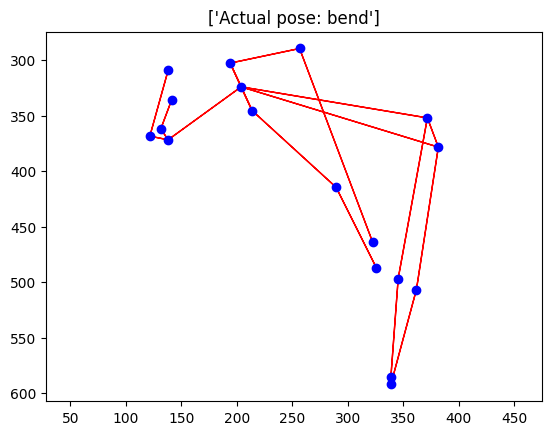

In [41]:
def SkelletonPoints(sk):
  x = []
  y = []
  for i in range(sk.shape[1]-18):
    x.append(sk[0][i])
    y.append(sk[0][i+18])
  points = np.stack((x,y))
  coordinates  = []
  for i in range(18):
    coordinates.append([points[0][i],points[1][i]])

  #Plot of the pose

  # Show points and coordinates
  for i, (x_p, y_p) in enumerate(coordinates):
      plt.plot(y_p, x_p, 'o', color='blue')

  plt.gca().invert_yaxis()
  plt.axis('equal')


  # Draw lines between points
  for a, b in connections:
      x1, y1 = coordinates[a]
      x2, y2 = coordinates[b]
      dx, dy = x2 - x1, y2 - y1
      plt.arrow(y1, x1, dy, dx, head_width=0.1, length_includes_head=True, color='red')
  index = (random_sp.index[0])
  pose_index = train_labels.iloc[:,index]
  title = 'Actual pose: ' + poses[pose_index-1]
  plt.title(title)
  return x,y


x,y = SkelletonPoints(random_sp.values)

# Testing

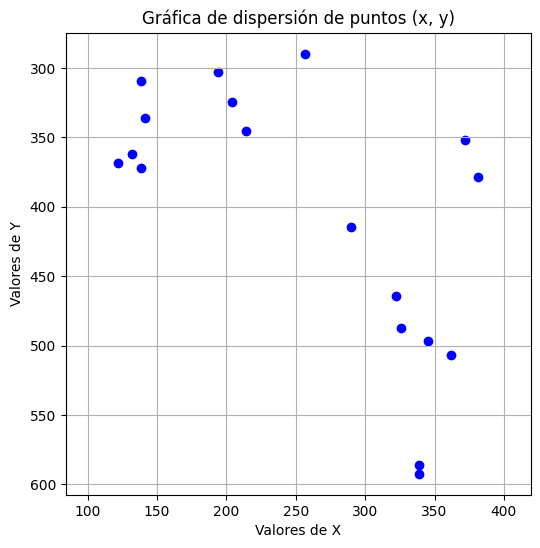

In [42]:
# Crear la gráfica de dispersión
plt.figure(figsize=(6, 6))
plt.scatter(y, x, color='b', marker='o')

plt.gca().invert_yaxis()

# Etiquetas y título
plt.title("Gráfica de dispersión de puntos (x, y)")
plt.xlabel("Valores de X")
plt.ylabel("Valores de Y")
plt.axis('equal')

# Mostrar la gráfica
plt.grid(True)
plt.show()